# Assignment 04
# Due: Wednesday, June 26, 2024, 3:59 PM
## Instructions:
1. Once the notebook is completed, export to .py file.  Submit both the notebook and the .py file.  To do this, click export at the top of the notebook or ctrl + shift + p at the top of the notebook and type in export.  Export to python file should show up as a search result.  Also:
    - Ensure that your .py file is an exact replica of your .ipynb file.  
    - Ensure your .py and .ipynb files run successfully without any errors.  You should be able to click `Run All` in VS Code and run the notebook without error before converting to a .py file.  When completed, you should be able to run the .py file from the terminal or command prompt.
2. DO NOT submit the data from the assignment and keep your data file and python file in the same directory. Do not use your local directory path to read files (e.g., avoid using paths like C:/your/directory/file.csv).  Just read in the file directly as if though it was in the same directory as your .ipynb file.  DO NOT CHANGE THE NAME OF THE FILE....
3. Whenever we ask to .head(10) the results or print out a value, please use `print()` so for example `print(df.head(10))`. Print only the answers to the questions that have been asked.  Do not print the head of a dataset unless explicitly asked. 
4. Whenever displaying a graph use `plt.show()`
5. For theoretical answers/short answers, please use print() (e.g., print("your answer")).
6. Wherever we have code displayed to print out values, use that code as a template to print out your output.  For example, if we give you `print(f'Threshold for best accuracy: {}')` please use code in this style to print out your output.  For some questions, this is only a template as we expect you to print out multiple answers (For example....Fit a linear regression model to each of the 5 features INDIVUDALLY and print out the slope and intercept for each. (Don't forget train/test split) requires you use the template for each feature)
7. Do not include pip install commands in your code. You can assume that all required libraries are already installed.

# Assignment 4: PCA with Crop Data

## Instructions:

Download your file from [here](https://clarksonmsda.org/datafiles/crop_yields/) or grab it from the zip file provided.  Your number is the same as in the last assignments.  This file has a number of nutrient columns which indicate how much of a particular nutrient is applied to a plot of land and a yield column which indicates the yield from that particular plot of land.  Our goal is to reduce the number of features using PCA.

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

crop_yield_df = pd.read_csv('../yields12.csv', index_col=0).reset_index(drop=True)
crop_yield_df

,nutrient00,nutrient01,nutrient02,nutrient03,nutrient04,nutrient05,nutrient06,nutrient08,nutrient09,nutrient10,...,nutrient14,nutrient15,nutrient16,nutrient18,nutrient20,nutrient21,nutrient22,nutrient23,nutrient24,yield
0,10.976946,8.390883,3.059433,12.269006,11.641961,9.366199,15.831206,5.735323,10.273754,9.483126,...,1.280065,0.572215,10.756369,7.392293,8.137769,5.317296,13.504224,16.200667,17.091611,39.742366
1,9.692377,8.452189,7.516174,4.742409,14.001220,21.887581,19.738035,19.544504,15.480909,14.965856,...,13.908982,10.612939,10.577985,9.298556,2.963677,7.708641,10.210804,14.922810,4.251523,40.260123
2,21.038247,7.493456,14.830188,12.018854,10.998012,16.038881,6.551046,9.164458,17.858793,11.058703,...,7.381918,23.212801,2.593564,8.452282,11.159963,16.935155,10.130084,18.389266,9.818824,38.632757
3,5.616451,8.734673,15.667765,6.766679,7.752399,17.393166,15.922647,15.840979,7.686784,13.966143,...,7.039538,4.545825,15.707226,7.784962,13.308860,19.293265,9.839826,9.568058,17.946444,39.666429
4,12.867685,9.057909,20.320779,18.740277,14.928418,10.077771,26.971701,21.296003,11.410985,9.758935,...,13.316003,5.293134,8.513264,8.535719,14.544805,12.592844,15.613778,21.370826,8.178115,43.285976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,3.809714,8.940498,11.531846,14.191307,18.415181,12.118989,7.084591,12.467657,18.736810,21.294956,...,18.623282,6.619453,15.225193,8.685138,2.647584,5.483445,20.301746,2.504418,11.336730,42.110034
1250,12.667177,8.794835,8.254307,10.795735,7.254221,21.847842,13.578511,17.445316,14.519739,14.260611,...,15.306729,17.375965,14.134436,8.259124,12.736093,11.153792,7.789777,4.605188,15.187299,39.853179
1251,16.374145,8.358967,14.884787,20.011048,7.628966,7.099242,14.204774,6.558209,18.490875,3.670743,...,18.054110,7.542603,3.677730,8.161118,10.061747,17.344302,2.526133,18.820677,4.302238,38.397316
1252,11.555712,8.761202,9.717998,14.671652,3.078023,17.713847,14.905723,9.072699,13.835384,6.005645,...,6.350454,11.448016,7.481624,7.260799,20.174574,2.243004,8.605327,15.558945,6.363163,41.053055


## 1. 

- a. Create a correlation matrix for the entire dataframe.

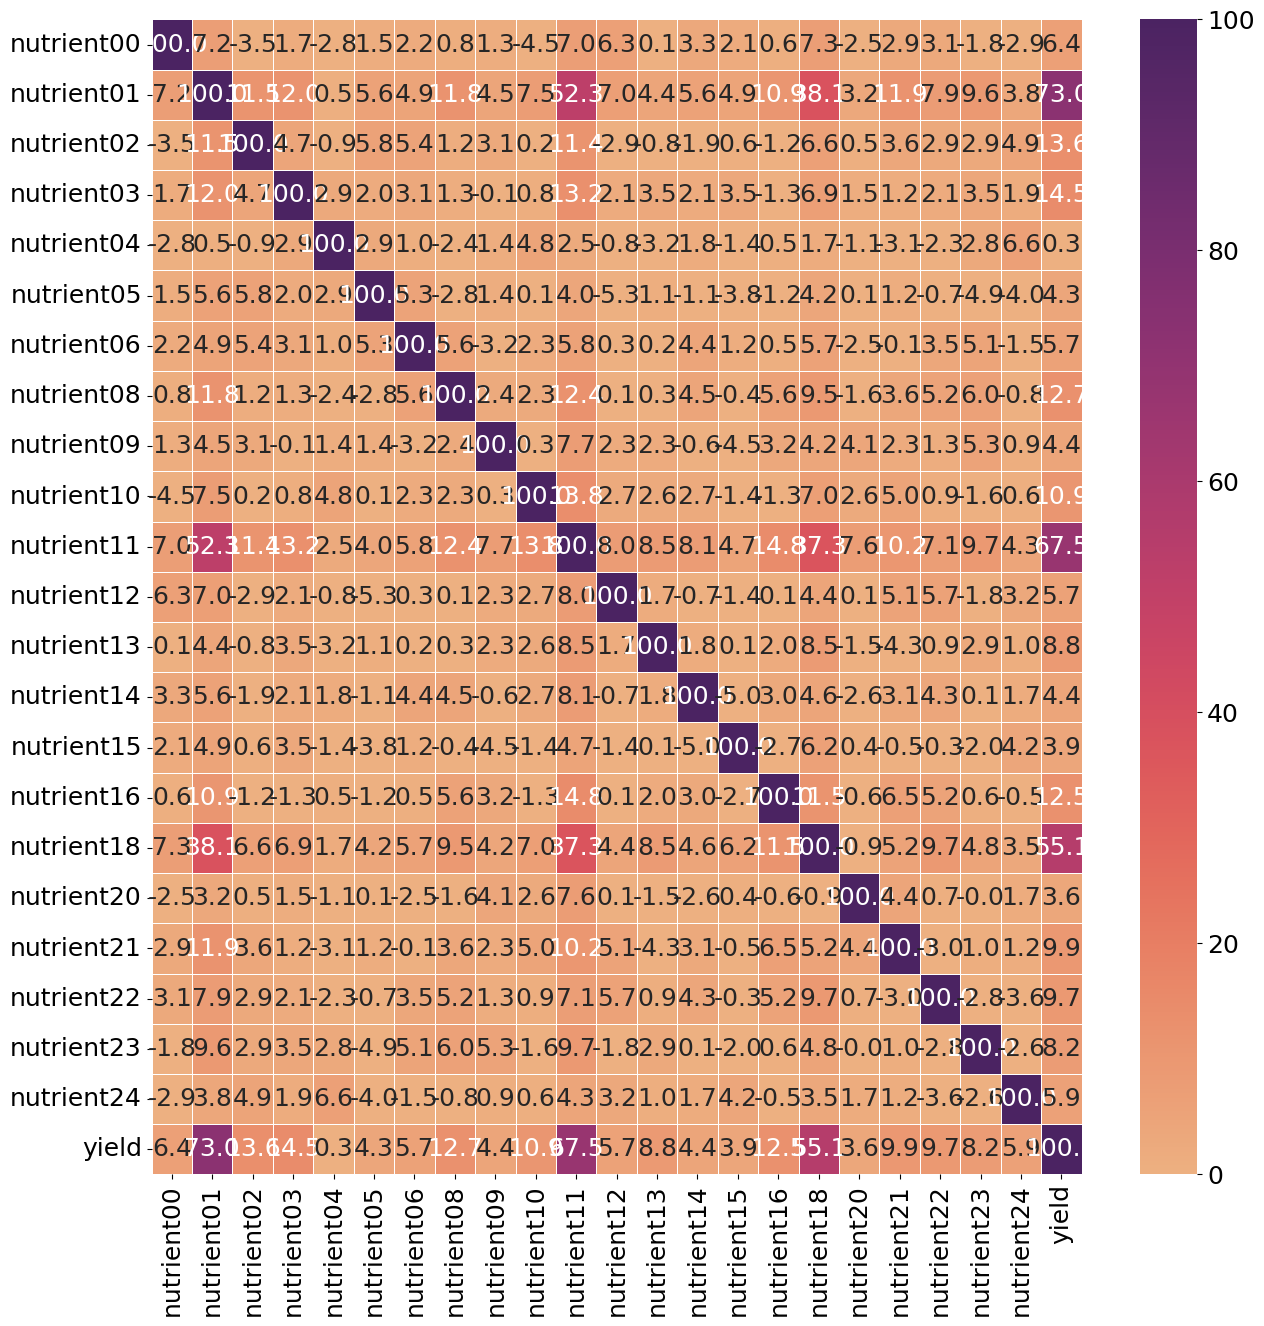

In [23]:
matrix = crop_yield_df.corr() * 100
plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True, linewidth=.5, vmin=0, vmax=100,
            fmt=".1f", cmap=sns.color_palette("flare", as_cmap=True))
plt.show()

- b. What nutrients seem most correlated with the yield variable?

In [24]:
print("""Your answer here""")

Your answer here


- c. What nutrients are highly correlated with each other and seem to be candidates for combining with PCA

In [25]:
print("""Your answer here""")

Your answer here


## 2.

Scale the data and determine how many principal components are needed to explain at least 80% of the variance. Remember only select your x variables.  Use 42 for your random seed.

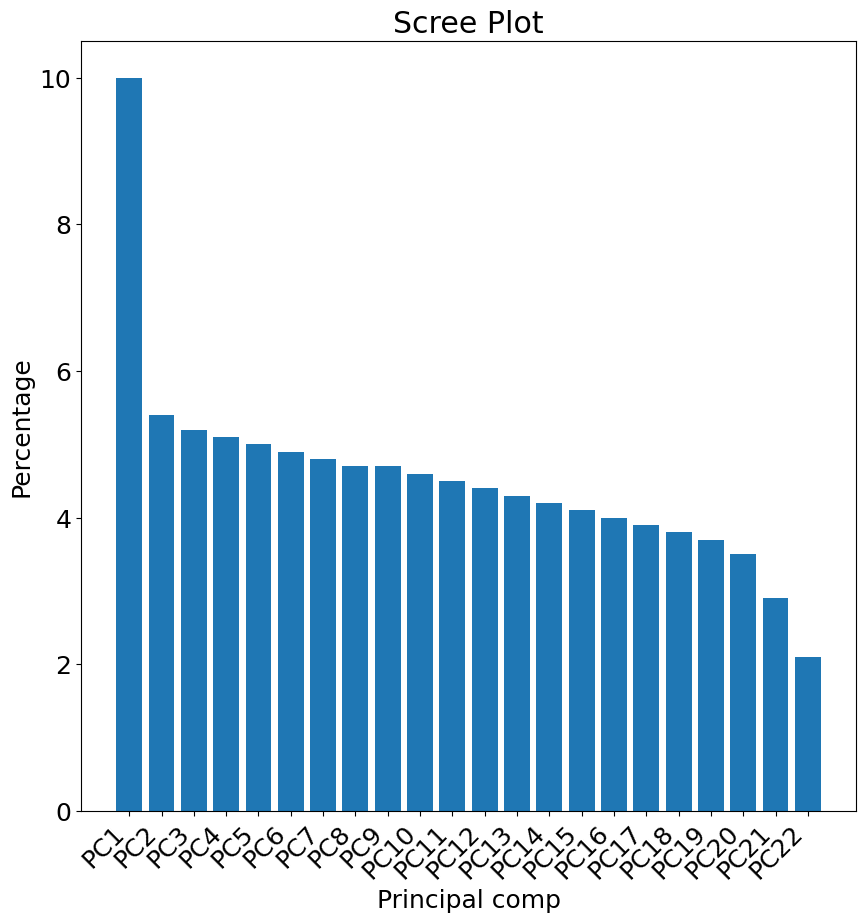

In [26]:
# Scale the data before PCA
features = [c for c in crop_yield_df.columns if c!='yield']
X = crop_yield_df[features].copy()
y = crop_yield_df['yield']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

# n_components can also be a percentage indicating the percentage of explained variance you want to capture
pca = PCA(random_state=42)

pca_data = pca.fit_transform(scaled_data)

# Multiply explained by 100 and round
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# Create labels for barplot
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(10,10))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.xticks(rotation=45, ha='right')
plt.title('Scree Plot')

plt.show()



In [27]:
print(f'{np.argmax(np.cumsum(pca.explained_variance_ratio_)>0.80) + 1} number of principal components are needed to explain at least 80% of the variance')

16 number of principal components are needed to explain at least 80% of the variance


## 3.

- a. Generate a single loadings chart like we did in class.  USE random_state=42 in your PCA.  You can accomplish this by using the first and third way we accomplished this in class, but not the second.  Don't use plotly.

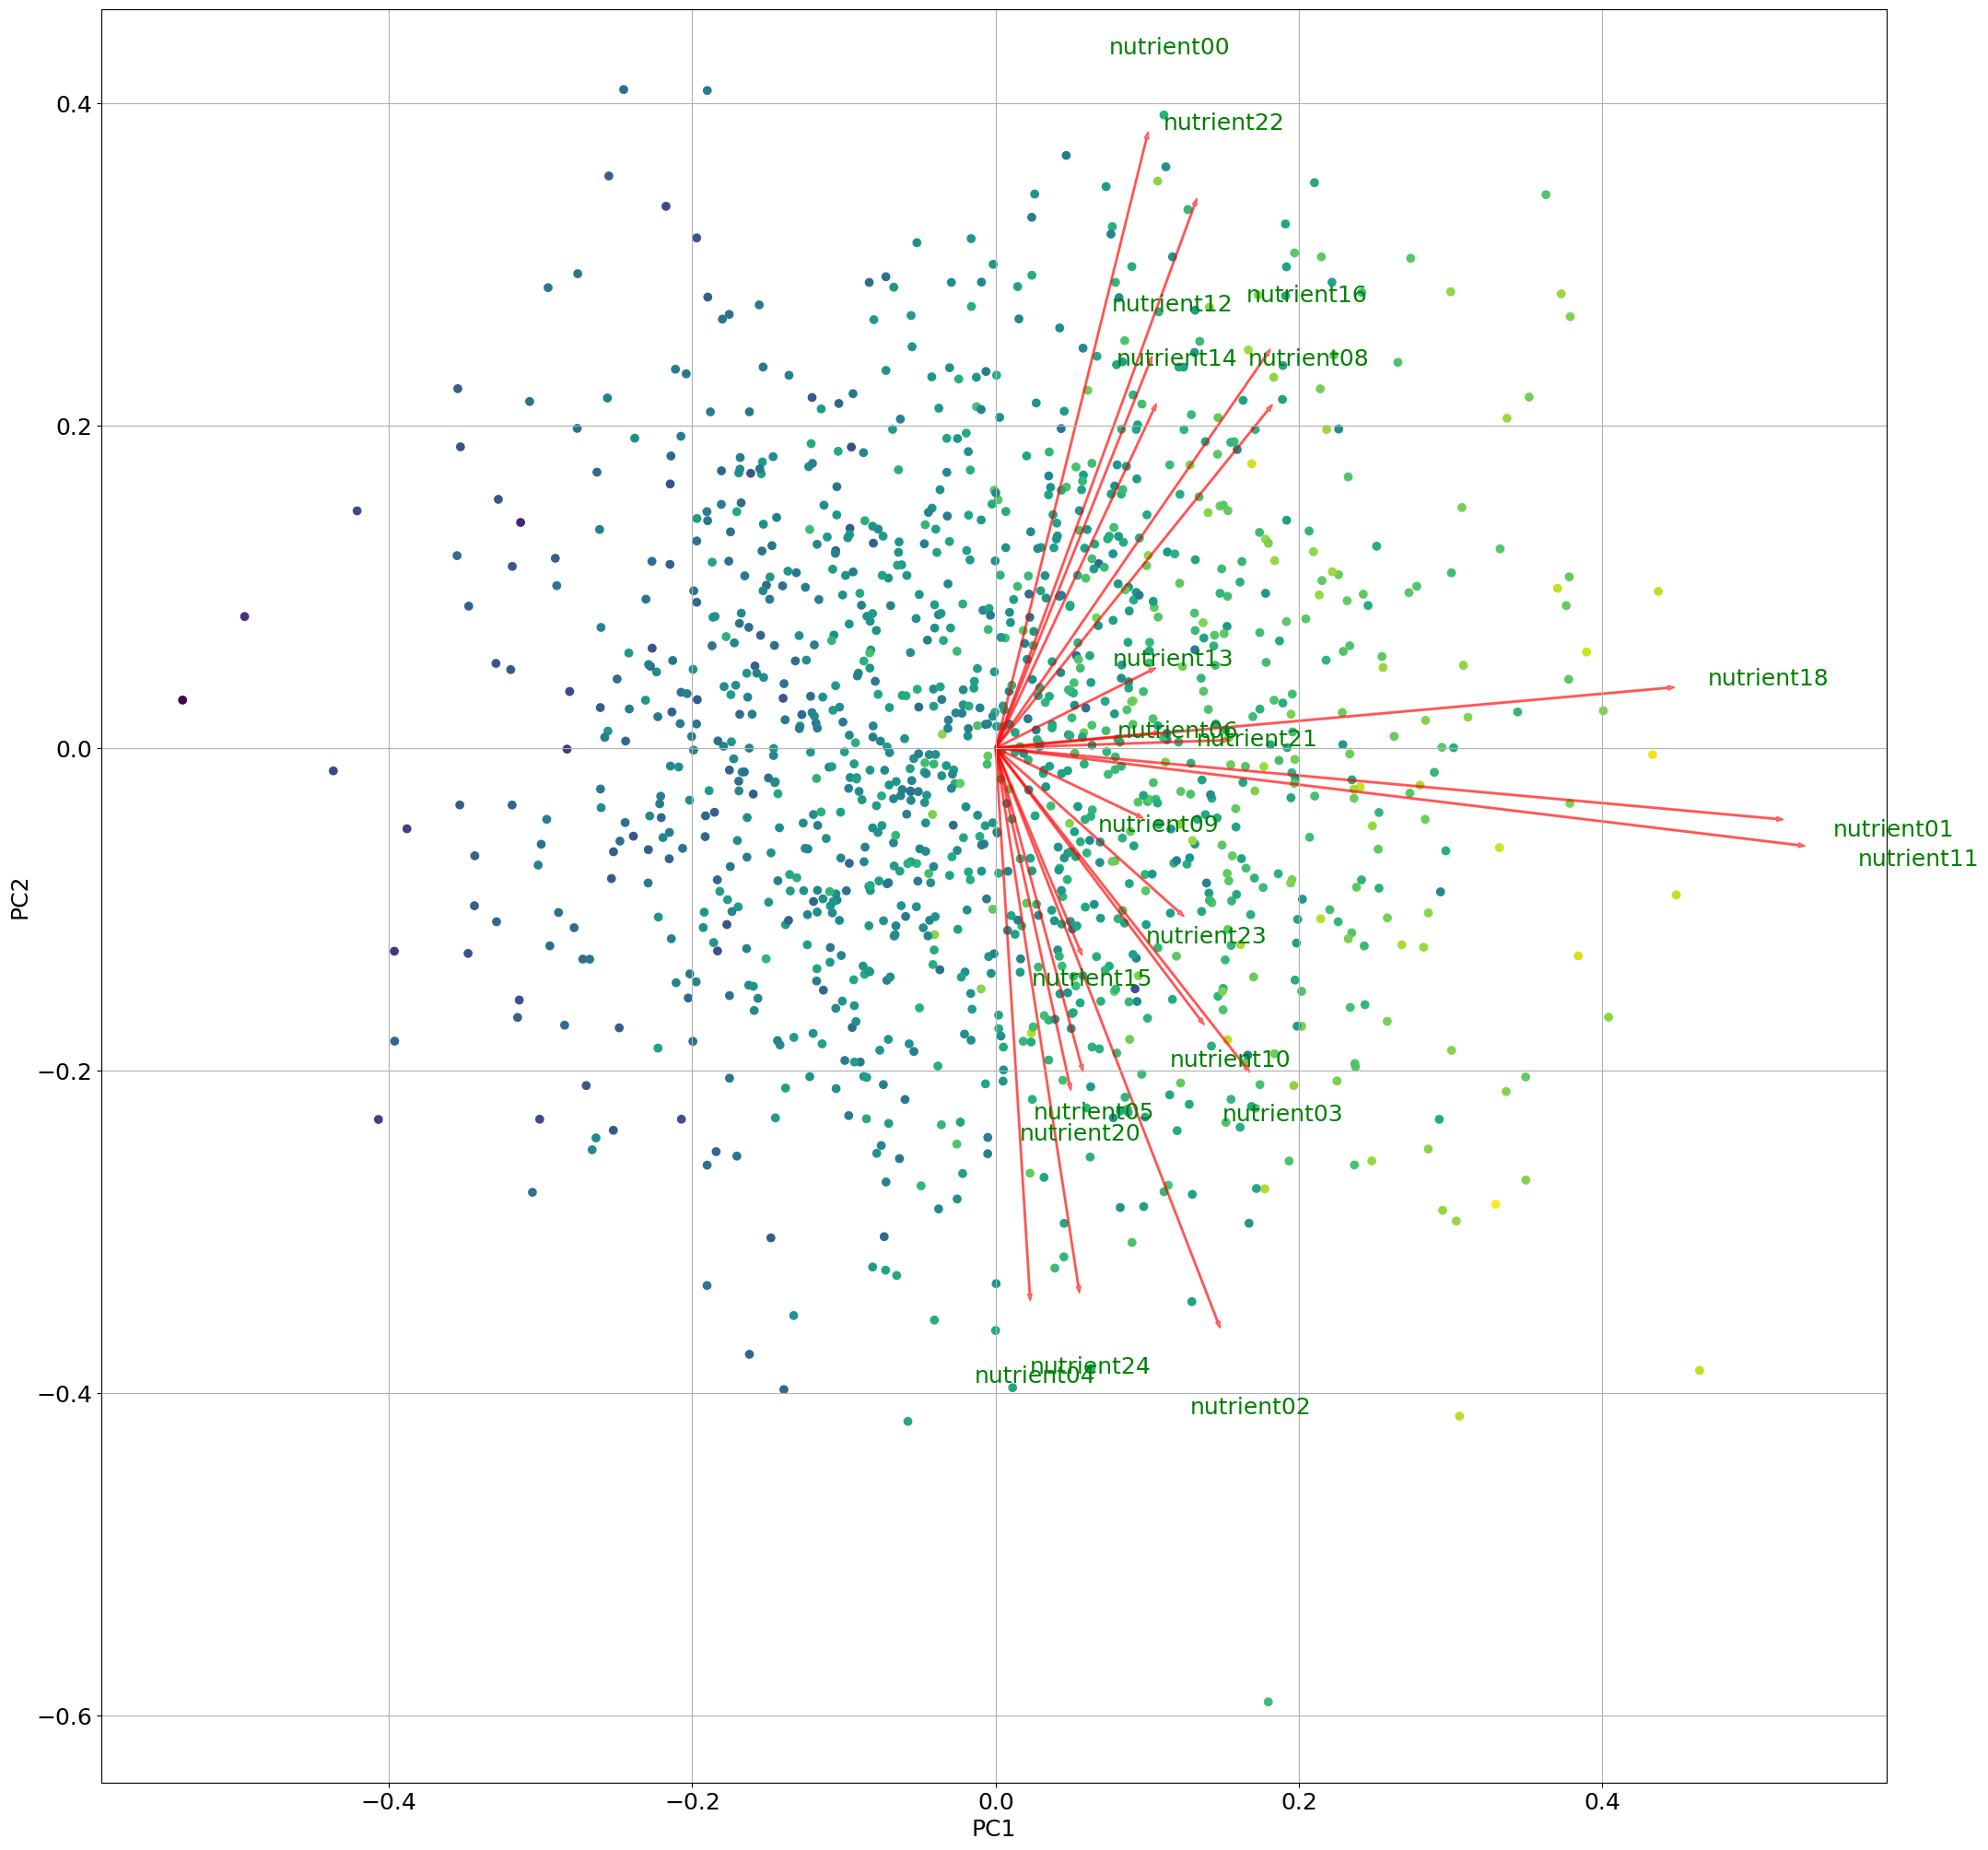

In [28]:
def myplot(score, coeff, labels, y):
    # Grab first two principal components
    principal_component_1 = score[:, 0]
    principal_component_2 = score[:, 1]
    n = coeff.shape[0]
    # Scale the x and y to make the loadings easier to see
    scalex = 1.0/(principal_component_1.max() - principal_component_1.min())
    scaley = 1.0/(principal_component_2.max() - principal_component_2.min())
    plt.figure(figsize=(25,25))
    plt.scatter(principal_component_1 * scalex, principal_component_2 * scaley, c=y)
    for i in range(n):
        # Plot an arrow for each component weight
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        # Plot the name of the component (use 1.15 to plot the text slightly above the arrow)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15,
                 labels[i], color='g', ha='center', va='center')


    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    plt.show()
# Call the function. Use only the 2 PCs.
myplot(pca_data, np.transpose(pca.components_), features, y)

In [29]:
len(pca_data), len(features), len(pca.components_), len(y)

(1254, 22, 22, 1254)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [22] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [16] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[16]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


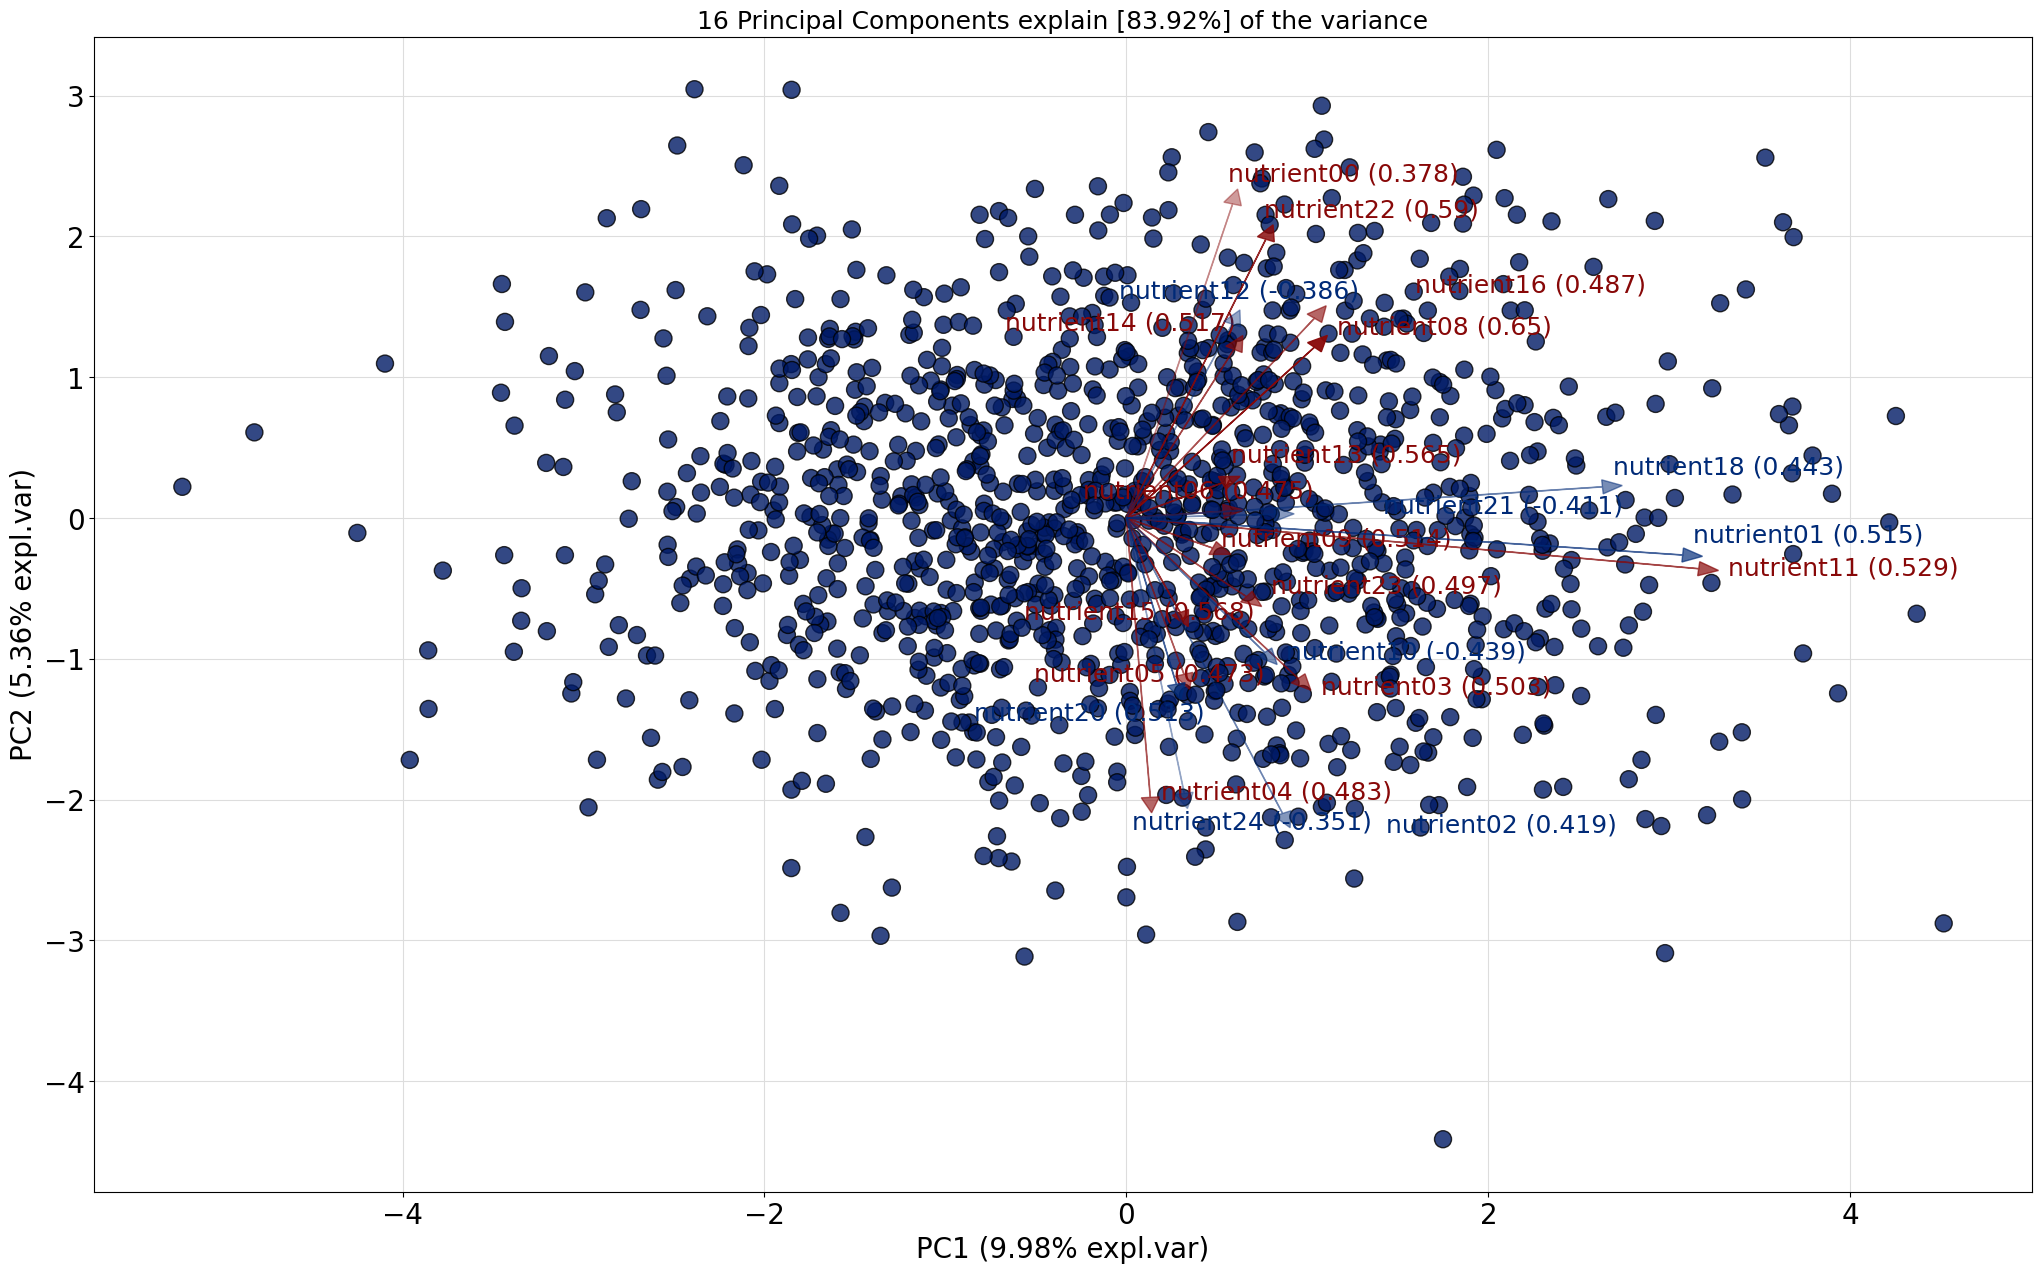

In [9]:
from pca import pca
###########################################################
# COMPUTE AND VISUALIZE PCA
###########################################################
# Initialize the PCA
model = pca(n_components=0.80)

# Fit and transform
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)
results = model.fit_transform(X=scaled_data_df)

# Create a biplot
fig, ax = model.biplot()

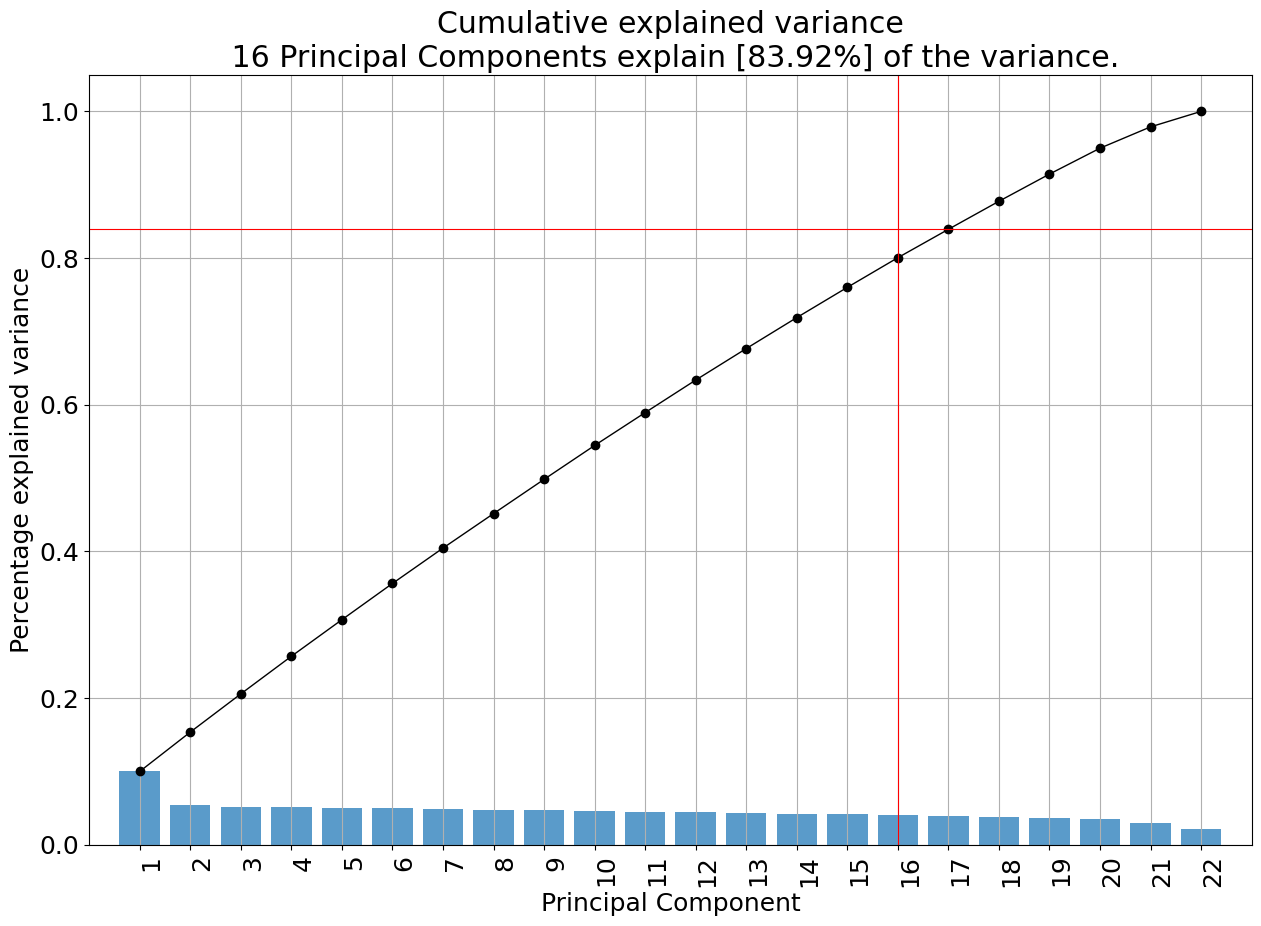

In [10]:
# Plot the explained variance
fig, ax = model.plot()

- b. Which nutrients seem to contribute the most to the first principal component?

In [11]:
print("""Your answer here""")

Your answer here


- c. Does this back up your analysis of the correlation matrix in question 1c?

In [12]:
print("""Your answer here""")

Your answer here


## 4. 

- a. Use the first two principal components to fit a regression with yield as the y variable.  Remember to create a train test split.  Use a test size of 0.2 and a random seed of 42.  Print out the coefficients and intercept for your line

In [13]:
pca_data_df = pd.DataFrame(pca_data, columns=labels)
X_train, X_test, y_train, y_test = train_test_split(pca_data_df, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train[['PC1', 'PC2']], y_train)

for feature_name,weight in zip(reg.feature_names_in_, reg.coef_):
    print(f'Feature Name: {feature_name}\n  Weight: {weight}')

print(f'Intercept: {reg.intercept_}')

Feature Name: PC1
  Weight: 1.1126312899372455
Feature Name: PC2
  Weight: -0.09159943424612553
Intercept: 40.1464940865752


- b. Print out the R^2 and MSE for the training and test data.

In [14]:
y_train_pred = reg.predict(X_train[['PC1', 'PC2']])
y_test_pred = reg.predict(X_test[['PC1', 'PC2']])

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')

print(f'Training R^2: {reg.score(X_train[['PC1', 'PC2']], y_train)}')
print(f'Test R^2: {reg.score(X_test[['PC1', 'PC2']], y_test)}')

Training MSE: 1.6471864825705549
Test MSE: 1.6852128391715304
Training R^2: 0.6247798557692812
Test R^2: 0.589750907639309


## 5.

- a. Fit a line with the first three principal components and print out the coefficients and intercept.  Use the same train test split as before

In [15]:
reg = LinearRegression().fit(X_train[['PC1', 'PC2', 'PC3']], y_train)

for feature_name,weight in zip(reg.feature_names_in_, reg.coef_):
    print(f'Feature Name: {feature_name}\n  Weight: {weight}')

print(f'Intercept: {reg.intercept_}')

Feature Name: PC1
  Weight: 1.113515617444326
Feature Name: PC2
  Weight: -0.0915935634544406
Feature Name: PC3
  Weight: -0.051300511753878446
Intercept: 40.14627252933429


- b. Print out the R^2 and the MSE for the training and test data

In [16]:
y_train_pred = reg.predict(X_train[['PC1', 'PC2', 'PC3']])
y_test_pred = reg.predict(X_test[['PC1', 'PC2', 'PC3']])

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')

print(f'Training R^2: {reg.score(X_train[['PC1', 'PC2', 'PC3']], y_train)}')
print(f'Test R^2: {reg.score(X_test[['PC1', 'PC2', 'PC3']], y_test)}')

Training MSE: 1.6440264657578307
Test MSE: 1.6972678807879193
Training R^2: 0.625499690455146
Test R^2: 0.5868162220218381


- c. Did the test R^2 or MSE improve?

In [17]:
print("""Your answer here""")

Your answer here


## 6.

- a. Fit a line with the principal components that explain 80% of the variance and print out the coefficients and intercept.  Use the same train test split as before

In [18]:
reg = LinearRegression().fit(X_train.iloc[:,0:16], y_train)

for feature_name,weight in zip(reg.feature_names_in_, reg.coef_):
    print(f'Feature Name: {feature_name}\n  Weight: {weight}')

print(f'Intercept: {reg.intercept_}')

Feature Name: PC1
  Weight: 1.1147680950187968
Feature Name: PC2
  Weight: -0.10223644093885455
Feature Name: PC3
  Weight: -0.047590271365313144
Feature Name: PC4
  Weight: 0.11980893040536303
Feature Name: PC5
  Weight: 0.034335529579373816
Feature Name: PC6
  Weight: 0.06398785522142153
Feature Name: PC7
  Weight: 0.06311377697237228
Feature Name: PC8
  Weight: -0.13507332760617477
Feature Name: PC9
  Weight: 0.08037664824854523
Feature Name: PC10
  Weight: -0.09737947487632227
Feature Name: PC11
  Weight: 0.06178550947546651
Feature Name: PC12
  Weight: -0.02934005719934025
Feature Name: PC13
  Weight: 0.0570743635515442
Feature Name: PC14
  Weight: -0.1338884832101491
Feature Name: PC15
  Weight: -0.19835492444927635
Feature Name: PC16
  Weight: -0.27450045354611824
Intercept: 40.155953801500615


- b. Print out the R^2 and the MSE for the training and test data

In [19]:
y_train_pred = reg.predict(X_train.iloc[:,0:16])
y_test_pred = reg.predict(X_test.iloc[:,0:16])

print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')

print(f'Training R^2: {reg.score(X_train.iloc[:,0:16], y_train)}')
print(f'Test R^2: {reg.score(X_test.iloc[:,0:16], y_test)}')

Training MSE: 1.4577807584910003
Test MSE: 1.537559767574637
Training R^2: 0.6679254521296556
Test R^2: 0.6256956483859275


- c. Did the test R^2 or MSE improve?

In [20]:
print("""Your answer here""")

Your answer here
